# 2. szorgalmi feladat

###**J**: A regressziós modell által tanult hipotézisfüggvény vizualizációja.

A 2. kötelező házi feladat A-E feladatainak megoldása szükséges ehhez a feladathoz. Az említett feladatok megoldása átmásolható ebbe a notebookba.

- Válassz ki két input változót a használt adatbázisból. Az ehhez a feladathoz felhasznált adatbázis szabadon választható a 6 lehetőség közül, nem szükséges feltétlenül a kötelező házi feladatban kijelölt adatbázissal dolgozni.
- Futtasd le és tanítsd be az A-E részfeladatokat csak a kiválasztott két input változót használva.
- Vizualizáld a regressziós modell által tanult hipotézisfüggvényt egy matplotlib pcolor (pcolormesh) ploton!
- Rajzold ki ugyanarra a grafikonra a teszthalmaz adatpontjait! A grafikon úgy legyen méretezve, hogy a teszthalmaz összes adatpontja ráférjen a grafikonra és nagyjából kitöltsék azt!
- A grafikon rendelkezzen szín-érték skálával (colorbar).
- A betanításhoz a kötelező házi feladatot követve skálázd a két input változót azonos nagyságrendre, de a grafikonon a tengelyek az eredeti értékeket mutassák, ne a normalizáltakat.
- A grafikon két tengelye mellett szerepeljen a két input változó neve. Az input változók nevei megtalálhatók az adatbázis első sorában.

Egy példa az előállított grafikonra. Ehhez a grafikonhoz a beton-szilárdság (6.) adatbázis "cement mennyisége" és "beton életkora" változókat használtuk fel.

<img src="https://docs.google.com/uc?export=download&id=1Yax_glMlruUCASuyjZhmbrKEvA5b9FG5" style="display:inline-block">
<hr>

###**K**: A klasszifikációs modell által tanult kategorizációs döntés vizualizációja.

A 2. kötelező házi feladat A-C és F-I feladatainak megoldása szükséges ehhez a feladathoz. Az említett feladatok megoldása átmásolható ebbe a notebookba.

- Válassz ki két input változót a használt adatbázisból. Az ehhez a feladathoz felhasznált adatbázis szabadon választható a 6 lehetőség közül, nem szükséges feltétlenül a kötelező házi feladatban kijelölt adatbázissal dolgozni.
- Futtasd le és tanítsd be az A-C és F-I részfeladatokat csak a kiválasztott két input változót használva.
- Vizualizáld a klasszifikációs modell által tanult döntést egy matplotlib pcolor (pcolormesh) ploton! Azaz, minden pixelre a legvalószínűbbnek becsült kategória színét rajzold ki!
- Rajzold ki ugyanarra a grafikonra a teszthalmaz adatpontjait! A grafikon úgy legyen méretezve, hogy a teszthalmaz összes adatpontja ráférjen a grafikonra és nagyjából kitöltsék azt! Az adatpontokat színezd három színnel aszerint, hogy valójában melyik kategóriába tartoznak. (Az azonos kategóriájú pixelek és adatpontok színe ne legyen ugyanaz, hogy látszódjanak a pontok a háttéren...)
- A grafikon rendelkezzen szín-érték skálával (colorbar).
- A betanításhoz a kötelező házi feladatot követve skálázd a két input változót azonos nagyságrendre, de a grafikonon a tengelyek az eredeti értékeket mutassák, ne a normalizáltakat.
- A grafikon két tengelye mellett szerepeljen a két input változó neve. Az input változók nevei megtalálhatók az adatbázis első sorában.

Egy példa az előállított grafikonra. Ehhez a grafikonhoz a beton-szilárdság (6.) adatbázis "cement mennyisége" és "beton életkora" változókat használtuk fel. (A 0-s, 1-es, 2-es igazi kategóriájú adatpontok színe rendre cián, lime-zöld, narancssárga ezen az ábrán.)

<img src="https://docs.google.com/uc?export=download&id=113huT3ySbjV-uinP9NXOJ_B_o2zrJBcE" style="display:inline-block">
<hr>

Az adatbázis letöltése.

In [1]:
import urllib.request
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.layers
import tensorflow.keras.activations
import tensorflow.keras.callbacks
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
dataset1 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/qsar_fish_toxicity.csv', ',')
dataset2 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-mat_prep.csv', ';')
dataset3 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-por_prep.csv', ';')
dataset4 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-mat_nograde_prep.csv', ';')
dataset5 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-por_nograde_prep.csv', ';')
dataset6 = ('https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/Concrete_Data.csv', ',')

#

def get_dataset(url, delim, attrs=None):
  """
  :param attrs: The attributes to use.
                Defaults to None, which means use all attributes.
  """
  ftpstream = urllib.request.urlopen(url)
  content = ftpstream.read().decode('utf-8')

  lines = content.split("\n")

  selected = [i for (i, attr_name) in enumerate(lines[0].split(delim)) if attrs == None or attr_name in attrs]

  words = [line.split(delim) for line in lines[1:-1]]    # ignore attribute names and last (empty) line

  vals = [[float(item) for item in rec] for rec in words]
  vals = np.array(vals, dtype=np.float32)

  splitted = np.hsplit(vals, (vals.shape[1] - 1,))

  return splitted[0][:, selected], splitted[1].flatten()  # (features, labels)

###**A-C**: Adatok előkészítése.

In [3]:
# implement your solution BELOW


### Dataset to use

# dataset = dataset3
# attr_names = ('studytime', 'freetime')

dataset = dataset6
attr_names = ('Cement (component 1)(kg in a m^3 mixture)', 'Age (day)')


### Prepare dataset

# 1. filter relevant data

features, labels = get_dataset(*dataset, attr_names)

# 2. shuffle rows
p = np.random.permutation(len(labels))
features, labels = features[p], labels[p]

# 3. distribute elements
n_samp = len(features)
distr = (0.5, .25, .25)

distr = tuple(np.add.accumulate(np.array(distr) * n_samp, dtype=np.int32) + 1)
distr = np.insert(distr, 0, 0)  # indexing start at 0
ind1, ind2, ind3 = (np.s_[distr[i]:distr[i+1]] for i in range(len(distr) - 1))  # ngrams

x_unnorm_train, y_train = features[ind1], labels[ind1]

x_unnorm_val, y_val = features[ind2], labels[ind2]

x_unnorm_test, y_test = features[ind3], labels[ind3]


### Normalize data

per_feature_min = x_unnorm_train.min(axis=0)
per_feature_max = x_unnorm_train.max(axis=0)
per_feature_diff = (per_feature_max - per_feature_min)

x_train = (x_unnorm_train - per_feature_min) / per_feature_diff

x_val = (x_unnorm_val - per_feature_min) / per_feature_diff

x_test = (x_unnorm_test - per_feature_min) / per_feature_diff


###**J**: A regressziós modell által tanult hipotézisfüggvény vizualizációja.

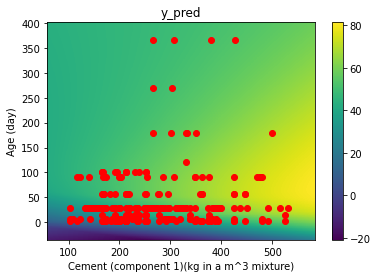

In [4]:
# implement your solution BELOW


### Create regression model

reg_model = tf.keras.models.Sequential()
reg_model.add(tf.keras.layers.Dense(50, activation="tanh", input_dim=x_train.shape[1]))
#reg_model.add(tf.keras.layers.Dense(70, activation="relu"))
reg_model.add(tf.keras.layers.Dense(30, activation="relu"))
reg_model.add(tf.keras.layers.Dense(1))

reg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                  loss="mse")


### Train regression model

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50)

reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
              batch_size=16, epochs=800, verbose=0, callbacks=[earlystopping_callback])


### Plot decision surface

# scale linspace bounds to fit test data
min_trainX, min_trainY = np.min(x_train, axis=0)
max_trainX, max_trainY = np.max(x_train, axis=0)
min_testX, min_testY = np.min(x_test, axis=0)
max_testX, max_testY = np.max(x_test, axis=0)

min_x1 = min(min_trainX, min_testX)
max_x1 = max(max_trainX, max_testX)
min_x2 = min(min_trainY, min_testY)
max_x2 = max(max_trainY, max_testY)

# add 10% space from the bounds
d_x1 = np.abs(min_x1 - max_x1) * 0.1
d_x2 = np.abs(min_x2 - max_x2) * 0.1

# create points to get predictions for
n_ps = len(x_train)

x1 = np.linspace(min_x1 - d_x1, max_x1 + d_x1, num=n_ps)
x2 = np.linspace(min_x2 - d_x2, max_x2 + d_x2, num=n_ps)
xx1, xx2 = np.meshgrid(x1, x2)
xs_eval = np.stack([xx1, xx2], axis=-1).reshape((-1, 2))  # (n, 2)

# get predictions
ys_pred = reg_model.predict(xs_eval)   # (n,)
ys_pred = ys_pred.reshape((n_ps, n_ps))

# inverse normalize grid points
xx1_unnorm = (xx1 * per_feature_diff[0]) + per_feature_min[0]
xx2_unnorm = (xx2 * per_feature_diff[1]) + per_feature_min[1]

# plot mesh points, and test data points
plt.figure()
CS = plt.pcolormesh(xx1_unnorm, xx2_unnorm, ys_pred)
plt.scatter(x_unnorm_test[:,0], x_unnorm_test[:,1], c='r')
plt.colorbar(CS)
plt.xlabel(attr_names[0])
plt.ylabel(attr_names[1])
plt.title("y_pred")
plt.show();


###**K**: A klasszifikációs modell által tanult kategorizációs döntés vizualizációja.

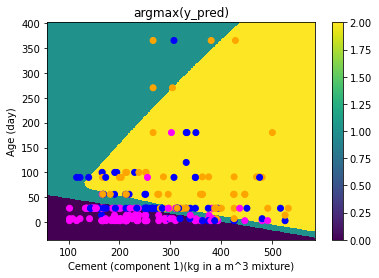

In [11]:
# implement your solution BELOW


### Convert regression dataset into classification dataset (cat_count categories)

cat_count = 3
ideal_group_size = len(y_train) / cat_count
ideal_group_counts = ideal_group_size * np.arange(1,cat_count)

uniqes, counts = np.unique(y_train, return_counts=True)

# lowest difference from ideal divison point
div_idx = np.argmin(np.absolute(np.add.accumulate(counts) - ideal_group_counts[:,None]), axis=1)

# matrix to compare which category a value falls into
div_vals = uniqes[div_idx]
div_vals_lower = np.insert(div_vals, 0, 0)
div_vals_upper = np.append(div_vals, uniqes[-1])

# used to categorize every value, based on the divison points
# calculated from the 'train' dataset (y_train)
def categorize(mx): return np.argmax( (div_vals_lower[:,None] < mx) &
                                      (mx <= div_vals_upper[:,None]),
                                    axis=0 )

# categorize
to_categorize = (y_train, y_val, y_test)
y_cat_train, y_cat_val, y_cat_test = (categorize(mx) for mx in to_categorize)


### One-hot encode labels
to_encode = (y_cat_train, y_cat_val, y_cat_test)
y_onehot_train, y_onehot_val, y_onehot_test = (to_categorical(mx, cat_count) for mx in to_encode)


### Create multiclass classification model

cl_model = tf.keras.models.Sequential()
cl_model.add(tf.keras.layers.Dense(65, activation="tanh", input_dim=x_train.shape[1]))
cl_model.add(tf.keras.layers.Dense(40, activation="relu"))
cl_model.add(tf.keras.layers.Dense(cat_count, activation="softmax"))

cl_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
                 loss="categorical_crossentropy")


### Train regression model

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30)

cl_model.fit(x_train, y_onehot_train, validation_data=(x_val, y_onehot_val),
                       batch_size=32, epochs=800, verbose=0, callbacks=[earlystopping_callback])


### Plot decision surface

# scale linspace bounds to fit test data
min_trainX, min_trainY = np.min(x_train, axis=0)
max_trainX, max_trainY = np.max(x_train, axis=0)
min_testX, min_testY = np.min(x_test, axis=0)
max_testX, max_testY = np.max(x_test, axis=0)

min_x1 = min(min_trainX, min_testX)
max_x1 = max(max_trainX, max_testX)
min_x2 = min(min_trainY, min_testY)
max_x2 = max(max_trainY, max_testY)

# add 10% space from the bounds
d_x1 = np.abs(min_x1 - max_x1) * 0.1
d_x2 = np.abs(min_x2 - max_x2) * 0.1

# create points to get predictions for
n_ps = len(x_train)

x1 = np.linspace(min_x1 - d_x1, max_x1 + d_x1, num=n_ps)
x2 = np.linspace(min_x2 - d_x2, max_x2 + d_x2, num=n_ps)
xx1, xx2 = np.meshgrid(x1, x2)
xs_eval = np.stack([xx1, xx2], axis=-1).reshape((-1, 2))  # (n, 2)

# get predictions
ys_pred = cl_model.predict(xs_eval)   # (n,)
ys_pred_classes = np.argmax(ys_pred, axis=1)
ys_pred_classes = ys_pred_classes.reshape((n_ps, n_ps))


# inverse normalize grid points
xx1_unnorm = (xx1 * per_feature_diff[0]) + per_feature_min[0]
xx2_unnorm = (xx2 * per_feature_diff[1]) + per_feature_min[1]

# plot mesh points, and test data points
colors = {0: 'magenta', 1: 'b', 2: 'orange'}
plt.figure()
CS = plt.pcolormesh(xx1_unnorm, xx2_unnorm, ys_pred_classes)
plt.scatter(x_unnorm_test[:,0], x_unnorm_test[:,1], c=[colors[y] for y in y_cat_test])
plt.colorbar(CS)
plt.xlabel(attr_names[0])
plt.ylabel(attr_names[1])
plt.title("argmax(y_pred)")
plt.show();
